In [1]:
import torch
import torchvision
from torchvision import datasets, io, models, ops, transforms, utils
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch import optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import random
import pandas as pd
import os
%matplotlib inline



In [2]:

train_dataset = torchvision.datasets.ImageFolder(root='../input/cropped-faces/CroppedYale')

# Loading the data with Pytorch Dataloader

data_dir = '../input/cropped-faces/CroppedYale'

transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])


transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()
                               ])

dataset = datasets.ImageFolder(data_dir, transform=transform) # This creates an image folder 
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)



In [3]:

# showing the image

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax



<Axes: >

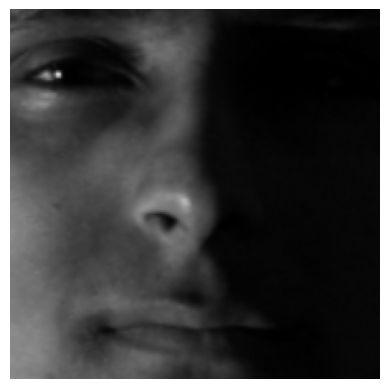

In [4]:

images, labels = next(iter(dataloader))
# helper.imshow(images[0], normalize=False)
imshow(images[15], normalize=False)



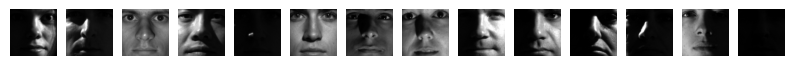

In [5]:
# plotting multiple images
data_iter = iter(dataloader)
fig, axes = plt.subplots(figsize=(10, 4), ncols=14)
for ii in range(14):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)



In [6]:

# data loader and the train and test in pytorch
class AE(nn.Module):

  def __init__(self):
      super().__init__()
      self.encoder = nn.Sequential(
          
          nn.Linear(28*28, 128),
          nn.ReLU(inplace=True),
          nn.Linear(128, 64),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.ReLU(),
      )
      self.decoder = nn.Sequential(
          
          nn.Linear(32, 64),
          nn.ReLU(),
          nn.Linear(64, 128),
          nn.ReLU(),
          nn.Linear(128, 28*28),
          nn.ReLU()
      )

  def forward(self, x):
      x = self.encoder(x)
      x = self.decoder(x)
      return x


In [7]:

model = AE()
lr = 0.001
weight_decay = 1e-5
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr =lr, weight_decay = weight_decay)
epochs = 5


In [8]:

all_loss = []

for i in range(epochs):

  for idx, batch in enumerate(dataloader):

      output = model(batch[0].view(-1, 28*28))
      loss_value = loss(output, batch[0].view(-1, 28*28))

      model.zero_grad()
      loss_value.backward()

      all_loss.append(loss_value)
      optimizer.step()
  print(i)
  print(f"All loss {all_loss[-1]}")


0
All loss 0.036345500499010086
1
All loss 0.019152063876390457
2
All loss 0.011020977050065994
3
All loss 0.0067722005769610405
4
All loss 0.005119671113789082


# Convolutional Auto Encoder with Pytorch

In [9]:
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros') 

import torch.nn as nn
import torch.nn.functional as F

class AE_con(nn.Module):
    
  def __init__(self):
    
    super(AE_con, self).__init__() 
    
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
    
    self.conv2 = nn.Conv2d(16, 4, 3, padding=1) 
    
    self.pool = nn.MaxPool2d(2, 2) 
    
    self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2) 
    
    self.t_conv2 = nn.ConvTranspose2d(16, 3, 2, stride=2)
    
  def forward(self, x):  
    
      x = F.relu(self.conv1(x)) 
        
      x = self.pool(x)  
    
      x = F.relu(self.conv2(x))  
        
      x = self.pool(x)  
    
      x = F.relu(self.t_conv1(x))  
        
      x = F.sigmoid(self.t_conv2(x)) 
    
      return x 
   

model = AE_con()
print(model)
    

AE_con(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
)


In [10]:
# Convolutional Auto Encoder

Convolutional_AutoEncoder = AE_con()
lr = 0.005
weight_decay = 1e-5
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr =lr, weight_decay = weight_decay)


In [11]:


model = Convolutional_AutoEncoder
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20

for epoch in range(num_epochs):

    train_loss = 0.0

    for data in dataloader:
         img, _ = data
         

         # Forward Pass
         output = model(img)

         # This compute the loss
         loss = criterion(output, img)

         # Backward Pass
         optimizer.zero_grad()
         loss.backward()
         optimizer.step()

         train_loss += loss.item() * img.size(0)
    train_loss = train_loss / len(dataloader.dataset)
    
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))


Epoch: 0 	Training Loss: 0.668114
Epoch: 1 	Training Loss: 0.481672
Epoch: 2 	Training Loss: 0.428299
Epoch: 3 	Training Loss: 0.424577
Epoch: 4 	Training Loss: 0.423411
Epoch: 5 	Training Loss: 0.422744
Epoch: 6 	Training Loss: 0.422335
Epoch: 7 	Training Loss: 0.421996
Epoch: 8 	Training Loss: 0.421747
Epoch: 9 	Training Loss: 0.421506
Epoch: 10 	Training Loss: 0.421304
Epoch: 11 	Training Loss: 0.421125
Epoch: 12 	Training Loss: 0.421006
Epoch: 13 	Training Loss: 0.420900
Epoch: 14 	Training Loss: 0.420787
Epoch: 15 	Training Loss: 0.420705
Epoch: 16 	Training Loss: 0.420603
Epoch: 17 	Training Loss: 0.420499
Epoch: 18 	Training Loss: 0.420383
Epoch: 19 	Training Loss: 0.420272


# Variational AutoEncoder 

In [12]:
# The Encoder Part of the Model
# we are basically adding more layers to this 
import tensorflow

img_size = 28
num_channels = 1
latent_space_dim = 2

x = tensorflow.keras.layers.Input(shape=(img_size, img_size, num_channels), name="encoder_input")

encoder_conv_layer1 = tensorflow.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1) 
encoder_active_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

encoder_conv_layer2 = tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_2")(encoder_active_layer1)
encoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
encoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_2")(encoder_norm_layer2)


encoder_conv_layer3 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
encoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_3")(encoder_norm_layer3)

encoder_conv_layer4 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
encoder_activ_layer4 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_4")(encoder_norm_layer4) 


encoder_conv_layer5 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)

shape_before_flatten = tensorflow.keras.backend.int_shape(encoder_activ_layer5)[1:]
encoder_flatten = tensorflow.keras.layers.Flatten()(encoder_activ_layer5)

encoder_mu = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_mu")(encoder_flatten)
encoder_log_variance = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_log_variance")(encoder_flatten)

encoder_mu_log_variance_model = tensorflow.keras.models.Model(x, (encoder_mu, encoder_log_variance), name="encoder_mu_log_variance_model")


def sampling(mu_log_variance):
    mu, log_variance = mu_log_variance
    epsilon = tensorflow.keras.backend.random_normal(shape=tensorflow.keras.backend.shape(mu), mean=0.0, stddev=1.0)
    random_sample = mu + tensorflow.keras.backend.exp(log_variance/2) * epsilon
    return random_sample

encoder_output = tensorflow.keras.layers.Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")





/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [13]:
encoder.summary()

Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 encoder_conv_1 (Conv2D)        (None, 28, 28, 1)    10          ['encoder_input[0][0]']          
                                                                                                  
 encoder_norm_1 (BatchNormaliza  (None, 28, 28, 1)   4           ['encoder_conv_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 encoder_leakyrelu_1 (LeakyReLU  (None, 28, 28, 1)   0           ['encoder_norm_1[0][0

In [14]:
# The Decoder section of the Variational AutoEncoder 
import numpy 

decoder_input = tensorflow.keras.layers.Input(shape=(latent_space_dim), name="decoder_input")
decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=numpy.prod(shape_before_flatten), name="decoder_dense_1")(decoder_input) 
decoder_reshape = tensorflow.keras.layers.Reshape(target_shape=shape_before_flatten)(decoder_dense_layer1) 
decoder_conv_tran_layer1 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

decoder_conv_tran_layer2 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_2")(decoder_activ_layer1)
decoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
decoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

decoder_conv_tran_layer3 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_3")(decoder_activ_layer2)
decoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
decoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

decoder_conv_tran_layer4 = tensorflow.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_4")(decoder_activ_layer3)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_conv_tran_layer4 )

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")


In [15]:
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 decoder_dense_1 (Dense)     (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 decoder_conv_tran_1 (Conv2D  (None, 7, 7, 64)         36928     
 Transpose)                                                      
                                                                 
 decoder_norm_1 (BatchNormal  (None, 7, 7, 64)         256       
 ization)                                                        
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 7, 7, 64)       